<a href="https://colab.research.google.com/github/Himanshu-1703/colab_notebooks/blob/main/PCA_using_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.datasets import make_classification

In [3]:
X, y = make_classification(n_samples=50,n_features=3,
                           n_informative=3,n_redundant=0,
                           random_state=89,)

# make data frame
df = pd.DataFrame()
df[['X1','X2','X3']] = X
df['y'] = y

df

,X1,X2,X3,y
0,1.071172,-0.609860,3.352364,0
1,0.151035,-2.395716,-0.515126,1
2,-0.617536,-0.725560,-0.379994,1
3,-0.445939,-1.466287,-1.695044,1
4,2.935157,0.993571,-1.772647,0
5,0.718835,1.289075,-0.277787,0
6,-0.421013,-1.605124,0.225007,1
7,0.935079,-0.322817,0.928735,1
8,-2.322839,-1.118394,-2.180169,1
9,-1.509410,-1.146223,-1.210437,1


In [4]:
# shape of the dataframe

df.shape

(50, 4)

In [6]:
# plot the data in a 3d scatter plot

px.scatter_3d(data_frame=df,
              x='X1',y='X2',z='X3',
              color='y')

### Steps

#### Standardize the data

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# fit and transform the X --> input data
X_scaled = scaler.fit_transform(X)

In [11]:
# check the mean of X_scaled

X_scaled.mean(axis=0)

array([-3.10862447e-17, -8.43769499e-17,  1.66533454e-16])

In [12]:
# check the std of X_scaled
X_scaled.std(axis=0)

array([1., 1., 1.])

#### Calculate the Cov matrix

In [23]:
# calculate the cov matrix

cov_matrix = np.cov([X_scaled[:,0],X_scaled[:,1],X_scaled[:,2]])
cov_matrix

array([[ 1.02040816,  0.29924086, -0.16865386],
       [ 0.29924086,  1.02040816, -0.1333538 ],
       [-0.16865386, -0.1333538 ,  1.02040816]])

#### Calculate the Eigen vectors and Eigen values

In [26]:
# calculate the eigen values and eigen vectors from the covariance matrix

eig_vals, eig_vec = np.linalg.eig(cov_matrix)

print(eig_vals)

[1.43096594 0.71841223 0.91184632]


In [27]:
eig_vec

array([[-0.63844186, -0.72983867,  0.24439211],
       [-0.61545679,  0.67477227,  0.40730251],
       [ 0.46217414, -0.10962619,  0.87998702]])

In [29]:
# select the largest two eigen values
principle_components = eig_vec[[0,2]]
principle_components

array([[-0.63844186, -0.72983867,  0.24439211],
       [ 0.46217414, -0.10962619,  0.87998702]])

#### Transform the data

In [31]:
# do the dot product of the principle components and the input data

results = np.dot(a=X_scaled,b=principle_components.T)

# form a dataframe

df_pca = pd.DataFrame()

df_pca[['PC1','PC2']] = results
df_pca['y'] = y

In [32]:
df_pca

,PC1,PC2,y
0,0.452155,2.949697,0
1,1.164415,0.069787,1
2,0.509978,-0.225209,1
3,0.624647,-1.041457,1
4,-2.335188,-0.267792,0
5,-1.265059,0.080417,0
6,1.078009,0.347131,1
7,-0.142831,1.154168,1
8,1.125205,-2.003227,1
9,0.984092,-1.056399,1


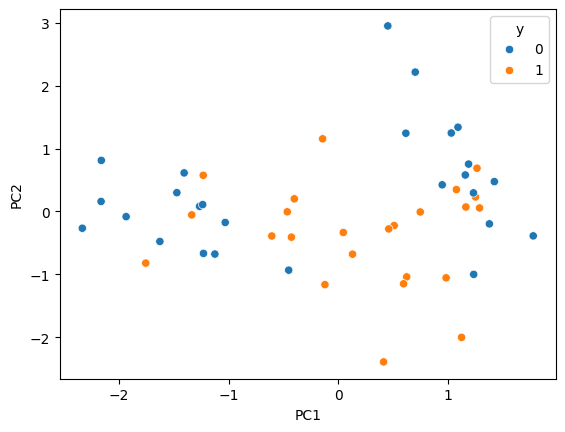

In [33]:
# plot the data on a 2D scatter plot

sns.scatterplot(data=df_pca,x='PC1',
                y='PC2',hue='y')
plt.show()